## Evaluate performance of models on prompt engineering set

* Few shot LLama 7b
* Few shot LLama 13
* Expert annotated set - "supposed ground truth


### Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Read data 

In [2]:
def load_file(file_relative_path, file_format='csv'):
    # Construct the absolute path
    absolute_path = '/data/volume_2/LLM_validate/src/analysis/performance/' + file_relative_path

    if file_format == 'csv':
        # Read the CSV file into a DataFrame
        df = pd.read_csv(absolute_path)
    elif file_format == 'excel':
        # Read the Excel file into a DataFrame
        df = pd.read_excel(absolute_path)
    else:
        raise ValueError("Unsupported file format. Supported formats are 'csv' and 'excel'.")

    return df


In [3]:
def load_excel_file(file_relative_path):
    # Construct the absolute path
    absolute_path = '/data/volume_2/LLM_validate/src/analysis/performance/' + file_relative_path

    # Read the Excel file into a DataFrame
    df = pd.read_excel(absolute_path)

    return df

### Temperature 0.0

In [6]:
#7b
df1 = load_file('../../../../initial_out/7B_prompt_quality.csv') #temperature 0.0

In [5]:
df11 = load_file('../../../../initial_out/7B_prompt_quality_00.csv')

In [40]:
#13b
df2 = load_file('../../../../initial_out/13b_prompt_quality.csv') #temperature 0.0

In [35]:
#13b
df5 = load_file('../../../../initial_out/final_test13B.csv') #temperature 00.

In [30]:
#13b
d = load_file('../../../../initial_out/13b_prompt_quality_0_final.csv') #temperature 00.

In [32]:
c = load_file('../../../../initial_out/13b_prompt_quality_0_final_1.csv') #temperature 00.

In [37]:
b = load_file('../../../../initial_out/13b_prompt_quality_0_final_2.csv')

In [40]:
a = load_file('../../../../initial_out/13b_prompt_quality_0_final_3.csv')

In [42]:
e = load_file('../../../../initial_out/13b_prompt_quality_0_final_4.csv')

In [44]:
f = load_file('../../../../initial_out/13b_prompt_quality_0_final_6.csv')

### Temperature 0.2

In [180]:
df6 =load_file('../../../../initial_out/13b_prompt_quality_02.csv') #temperature 0.2

In [184]:
df7 =load_file('../../../../initial_out/13b_prompt_quality_02_1.csv') #temperature 0.2 second run

In [13]:
df12 = load_file('../../../../initial_out/7B_prompt_quality_02.csv')

In [15]:
df13 = load_file('../../../../initial_out/7B_prompt_quality_02_1.csv')

### Temperature 0.6

In [186]:
df8 =load_file('../../../../initial_out/13b_prompt_quality_06_1.csv') #temperature 0.6 first run

In [188]:
df9 =load_file('../../../../initial_out/13b_prompt_quality_06_2.csv') #temperature 0.6 second run

In [19]:
df14 = load_file('../../../../initial_out/7B_prompt_quality_06.csv') #temperature 0.6 first run

In [21]:
df15 = load_file('../../../../initial_out/7B_prompt_quality_06_1.csv') #temperature 0.6 first run

### Temperature 1

In [25]:
df10 = load_file('../../../../initial_out/13b_prompt_quality_1_1.csv') #temperature 1 first run
df16 = load_file('../../../../initial_out/7B_prompt_quality_1.csv') #temperature 1 first run
df17 = load_file('../../../../initial_out/7B_prompt_quality_1_1.csv') #temperature 2nd first run

In [ ]:
# Assuming you have a DataFrame named df2
row_index_to_replace = 89
new_value = '1' 

# Check if the row index is valid
if row_index_to_replace >= 0 and row_index_to_replace < len(df2):
    # Replace the text in the specified row and 'Event_match' column
    df2.loc[row_index_to_replace, 'Event_match'] = new_value
    print(f"Replaced text in row {row_index_to_replace} with '{new_value}'.")
else:
    print(f"Row index {row_index_to_replace} is out of range.")

In [10]:
#expert annotated
df3 = load_excel_file('../../../../initial_out/prompt_validation_set_final_done_.xlsx')

In [7]:
def change_columns_to_object(df, columns_to_convert):
    """
    Change the data type of specified columns in a DataFrame to object (string).

    Parameters:
    - df (pd.DataFrame): The DataFrame to modify.
    - columns_to_convert (list of str): List of column names to convert to object type.

    Returns:
    - pd.DataFrame: The modified DataFrame.
    """
    for column in columns_to_convert:
        if column in df.columns:
            df[column] = df[column].astype(int)
        else:
            print(f"Column '{column}' not found in the DataFrame.")
    return df

In [164]:
df3 = change_columns_to_object(df3, columns_to_convert=['event_match', 'topic_match'])

In [153]:
df1 = change_columns_to_object(df1, columns_to_convert=['Event_match', 'Topic_match'])

In [154]:
df2 = change_columns_to_object(df2, columns_to_convert=['Event_match', 'Topic_match'])

In [155]:
df5['Topic_match'].unique()

array([1, 0])

In [156]:
df5['Event_match'].unique()

array([1, 0])

### Calculate percision, F1, confusion matrix 

In [8]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix

def calculate_precision_recall_f1_accuracy(df1, df3):
    # Calculate precision, recall, F1 score, and accuracy based on the 'event-match' and 'topic_match' columns
    precision_event = precision_score(df3['event_match'], df1['Event_match'])
    recall_event = recall_score(df3['event_match'], df1['Event_match'])
    f1_event = f1_score(df3['event_match'], df1['Event_match'])
    accuracy_event = accuracy_score(df3['event_match'], df1['Event_match'])

    precision_topic = precision_score(df3['topic_match'], df1['Topic_match'])
    recall_topic = recall_score(df3['topic_match'], df1['Topic_match'])
    f1_topic = f1_score(df3['topic_match'], df1['Topic_match'])
    accuracy_topic = accuracy_score(df3['topic_match'], df1['Topic_match'])
    
    # Create confusion matrices based on the 'event_match' and 'topic_match' columns
    conf_matrix_topic = confusion_matrix(df3['topic_match'], df1['Topic_match'])
    conf_matrix_event = confusion_matrix(df3['event_match'], df1['Event_match'])

    # Return the results as a dictionary
    results = {
        "Precision (topic_match)": precision_topic,
        "Recall (topic_match)": recall_topic,
        "F1 Score (topic_match)": f1_topic,
        "Accuracy (topic_match)": accuracy_topic,
        "Precision (event_match)": precision_event,
        "Recall (event_match)": recall_event,
        "F1 Score (event_match)": f1_event,
        "Accuracy (event_match)": accuracy_event,
        "Confusion Matrix (topic_match)": conf_matrix_topic,
        "Confusion Matrix (event_match)": conf_matrix_event
    }

    return results


In [191]:
#7B results
results = calculate_precision_recall_f1_accuracy(df1, df3)
results

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.21951219512195122,
 'Recall (event_match)': 0.5625,
 'F1 Score (event_match)': 0.3157894736842105,
 'Accuracy (event_match)': 0.6060606060606061,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 7,  9]])}

In [36]:
#13B results
results4 = calculate_precision_recall_f1_accuracy(df5, df3)
results4

{'Precision (topic_match)': 0.8297872340425532,
 'Recall (topic_match)': 0.527027027027027,
 'F1 Score (topic_match)': 0.6446280991735537,
 'Accuracy (topic_match)': 0.5656565656565656,
 'Precision (event_match)': 0.3448275862068966,
 'Recall (event_match)': 0.625,
 'F1 Score (event_match)': 0.4444444444444445,
 'Accuracy (event_match)': 0.7474747474747475,
 'Confusion Matrix (topic_match)': array([[17,  8],
        [35, 39]]),
 'Confusion Matrix (event_match)': array([[64, 19],
        [ 6, 10]])}

In [193]:
#13B results
results5 = calculate_precision_recall_f1_accuracy(df6, df3)
results5

{'Precision (topic_match)': 0.8297872340425532,
 'Recall (topic_match)': 0.527027027027027,
 'F1 Score (topic_match)': 0.6446280991735537,
 'Accuracy (topic_match)': 0.5656565656565656,
 'Precision (event_match)': 0.3448275862068966,
 'Recall (event_match)': 0.625,
 'F1 Score (event_match)': 0.4444444444444445,
 'Accuracy (event_match)': 0.7474747474747475,
 'Confusion Matrix (topic_match)': array([[17,  8],
        [35, 39]]),
 'Confusion Matrix (event_match)': array([[64, 19],
        [ 6, 10]])}

In [39]:
#13B results
r2 = calculate_precision_recall_f1_accuracy(b, df3)
r2

{'Precision (topic_match)': 0.8709677419354839,
 'Recall (topic_match)': 0.36486486486486486,
 'F1 Score (topic_match)': 0.5142857142857142,
 'Accuracy (topic_match)': 0.48484848484848486,
 'Precision (event_match)': 0.3333333333333333,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.4,
 'Accuracy (event_match)': 0.7575757575757576,
 'Confusion Matrix (topic_match)': array([[21,  4],
        [47, 27]]),
 'Confusion Matrix (event_match)': array([[67, 16],
        [ 8,  8]])}

In [31]:
#13B results
r = calculate_precision_recall_f1_accuracy(d, df3)
r

{'Precision (topic_match)': 0.8297872340425532,
 'Recall (topic_match)': 0.527027027027027,
 'F1 Score (topic_match)': 0.6446280991735537,
 'Accuracy (topic_match)': 0.5656565656565656,
 'Precision (event_match)': 0.28,
 'Recall (event_match)': 0.4375,
 'F1 Score (event_match)': 0.34146341463414637,
 'Accuracy (event_match)': 0.7272727272727273,
 'Confusion Matrix (topic_match)': array([[17,  8],
        [35, 39]]),
 'Confusion Matrix (event_match)': array([[65, 18],
        [ 9,  7]])}

In [45]:
#13B results
r = calculate_precision_recall_f1_accuracy(f, df3) #latest
r

{'Precision (topic_match)': 0.8043478260869565,
 'Recall (topic_match)': 0.5,
 'F1 Score (topic_match)': 0.6166666666666667,
 'Accuracy (topic_match)': 0.5353535353535354,
 'Precision (event_match)': 0.375,
 'Recall (event_match)': 0.5625,
 'F1 Score (event_match)': 0.45,
 'Accuracy (event_match)': 0.7777777777777778,
 'Confusion Matrix (topic_match)': array([[16,  9],
        [37, 37]]),
 'Confusion Matrix (event_match)': array([[68, 15],
        [ 7,  9]])}

In [33]:
#13B results
r1 = calculate_precision_recall_f1_accuracy(c, df3)
r1

{'Precision (topic_match)': 0.8709677419354839,
 'Recall (topic_match)': 0.36486486486486486,
 'F1 Score (topic_match)': 0.5142857142857142,
 'Accuracy (topic_match)': 0.48484848484848486,
 'Precision (event_match)': 0.28,
 'Recall (event_match)': 0.4375,
 'F1 Score (event_match)': 0.34146341463414637,
 'Accuracy (event_match)': 0.7272727272727273,
 'Confusion Matrix (topic_match)': array([[21,  4],
        [47, 27]]),
 'Confusion Matrix (event_match)': array([[65, 18],
        [ 9,  7]])}

In [41]:
#13B results
r2 = calculate_precision_recall_f1_accuracy(a, df3)
r2

{'Precision (topic_match)': 0.8620689655172413,
 'Recall (topic_match)': 0.33783783783783783,
 'F1 Score (topic_match)': 0.4854368932038835,
 'Accuracy (topic_match)': 0.46464646464646464,
 'Precision (event_match)': 0.3333333333333333,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.4,
 'Accuracy (event_match)': 0.7575757575757576,
 'Confusion Matrix (topic_match)': array([[21,  4],
        [49, 25]]),
 'Confusion Matrix (event_match)': array([[67, 16],
        [ 8,  8]])}

In [43]:
#13B results
r3 = calculate_precision_recall_f1_accuracy(e, df3)
r3

{'Precision (topic_match)': 0.8709677419354839,
 'Recall (topic_match)': 0.36486486486486486,
 'F1 Score (topic_match)': 0.5142857142857142,
 'Accuracy (topic_match)': 0.48484848484848486,
 'Precision (event_match)': 0.3333333333333333,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.4,
 'Accuracy (event_match)': 0.7575757575757576,
 'Confusion Matrix (topic_match)': array([[21,  4],
        [47, 27]]),
 'Confusion Matrix (event_match)': array([[67, 16],
        [ 8,  8]])}

In [194]:
#13B results
results6 = calculate_precision_recall_f1_accuracy(df7, df3)
results6

{'Precision (topic_match)': 0.8297872340425532,
 'Recall (topic_match)': 0.527027027027027,
 'F1 Score (topic_match)': 0.6446280991735537,
 'Accuracy (topic_match)': 0.5656565656565656,
 'Precision (event_match)': 0.3448275862068966,
 'Recall (event_match)': 0.625,
 'F1 Score (event_match)': 0.4444444444444445,
 'Accuracy (event_match)': 0.7474747474747475,
 'Confusion Matrix (topic_match)': array([[17,  8],
        [35, 39]]),
 'Confusion Matrix (event_match)': array([[64, 19],
        [ 6, 10]])}

In [195]:
#13B results
results7 = calculate_precision_recall_f1_accuracy(df8, df3)
results7

{'Precision (topic_match)': 0.8297872340425532,
 'Recall (topic_match)': 0.527027027027027,
 'F1 Score (topic_match)': 0.6446280991735537,
 'Accuracy (topic_match)': 0.5656565656565656,
 'Precision (event_match)': 0.3448275862068966,
 'Recall (event_match)': 0.625,
 'F1 Score (event_match)': 0.4444444444444445,
 'Accuracy (event_match)': 0.7474747474747475,
 'Confusion Matrix (topic_match)': array([[17,  8],
        [35, 39]]),
 'Confusion Matrix (event_match)': array([[64, 19],
        [ 6, 10]])}

In [ ]:
#13B results
results9 = calculate_precision_recall_f1_accuracy(df10, df3)
results9

In [11]:
#7B results
results10 = calculate_precision_recall_f1_accuracy(df11, df3)
results10

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.2,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.28571428571428575,
 'Accuracy (event_match)': 0.5959595959595959,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 8,  8]])}

In [14]:
#7B results
results11 = calculate_precision_recall_f1_accuracy(df12, df3)
results11

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.2,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.28571428571428575,
 'Accuracy (event_match)': 0.5959595959595959,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 8,  8]])}

In [16]:
#7B results
results12 = calculate_precision_recall_f1_accuracy(df13, df3)
results12

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.2,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.28571428571428575,
 'Accuracy (event_match)': 0.5959595959595959,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 8,  8]])}

In [20]:
#7B results
results13 = calculate_precision_recall_f1_accuracy(df14, df3)
results13

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.2,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.28571428571428575,
 'Accuracy (event_match)': 0.5959595959595959,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 8,  8]])}

In [22]:
#7B results
results14 = calculate_precision_recall_f1_accuracy(df15, df3)
results14

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.2,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.28571428571428575,
 'Accuracy (event_match)': 0.5959595959595959,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 8,  8]])}

In [24]:
#7B results
results15 = calculate_precision_recall_f1_accuracy(df16, df3)
results15

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.2,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.28571428571428575,
 'Accuracy (event_match)': 0.5959595959595959,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 8,  8]])}

In [26]:
#7B results
results16 = calculate_precision_recall_f1_accuracy(df17, df3)
results16

{'Precision (topic_match)': 0.7976190476190477,
 'Recall (topic_match)': 0.9054054054054054,
 'F1 Score (topic_match)': 0.8481012658227848,
 'Accuracy (topic_match)': 0.7575757575757576,
 'Precision (event_match)': 0.2,
 'Recall (event_match)': 0.5,
 'F1 Score (event_match)': 0.28571428571428575,
 'Accuracy (event_match)': 0.5959595959595959,
 'Confusion Matrix (topic_match)': array([[ 8, 17],
        [ 7, 67]]),
 'Confusion Matrix (event_match)': array([[51, 32],
        [ 8,  8]])}

performance on topic level match increases with additional variables (party names and candiate names) 
BUT news event match performance descreases as the caveat this is that topics become more course and then news events become more course as well resulting in too many matches.

### Plot confusion matrix 

#### This confusion matrix is a 2x2 matrix that summarizes the performance of a binary classification model. It consists of four values:

* The top-left cell represents True Negatives (TN), which are the instances correctly classified as "Class 0."
* The top-right cell represents False Positives (FP), which are instances incorrectly classified as "Class 1."
* The bottom-left cell represents False Negatives (FN), which are instances incorrectly classified as "Class 0."
* The bottom-right cell represents True Positives (TP), which are instances correctly classified as "Class 1."

#### llama 7B

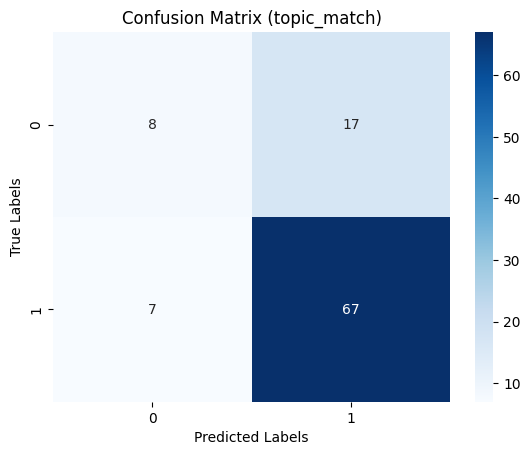

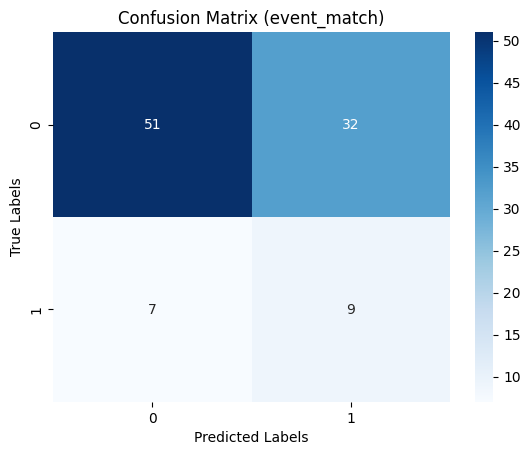

In [168]:
# Plot the confusion matrices
#llama 7b

sns.heatmap(results["Confusion Matrix (topic_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (topic_match)')
plt.show()


sns.heatmap(results["Confusion Matrix (event_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (event_match)')
plt.show()

#### llama 13B

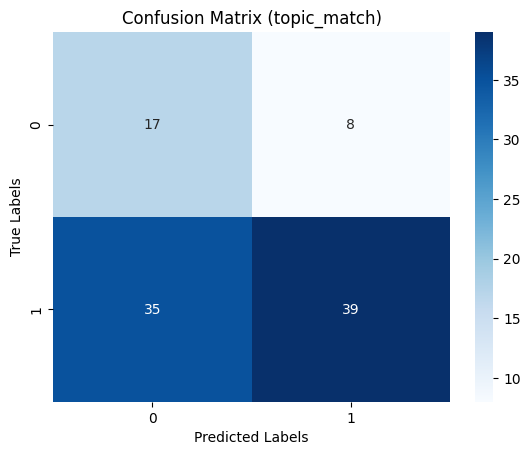

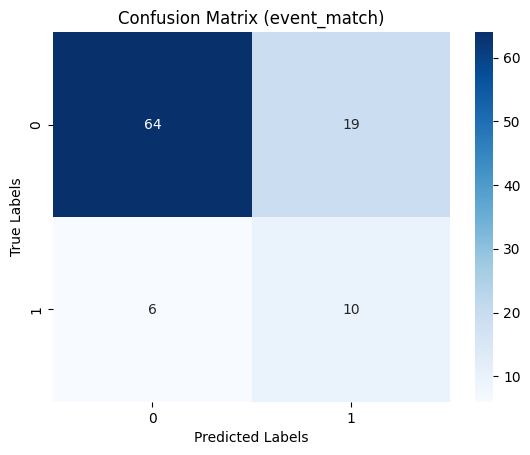

In [169]:
sns.heatmap(results4["Confusion Matrix (topic_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (topic_match)')
plt.show()


sns.heatmap(results4["Confusion Matrix (event_match)"], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (event_match)')
plt.show()

### Interpretation

So far model performance is not great. Llama 7b appears to perform better at identifying topic matches - it has higher agreement with expert annotations. But it performs very badly on news event match task.

On the other hand LLama 13b performs accetable on topic match task and mediocre on the new event level match.



## Manual Error analysis of disagreements

### Topic level

#### Llama 7B

In [174]:
# Get the indices of the rows where the predicted and ground truth labels differ
indices = np.where(df1['Topic_match'] != df3['topic_match'])
indices

(array([ 0,  7,  8,  9, 16, 17, 20, 21, 25, 43, 47, 52, 55, 56, 61, 63, 67,
        71, 78, 79, 87, 90, 97, 98]),)

In [46]:
# Get the predicted labels for the disputed rows along with 'Text1', 'Text2', and 'Topic_eval'
dis_7B_topic = df1.iloc[indices][['Text1', 'Text2', 'Topic_eval', 'Topic', 'Topic_match']]


In [47]:
# Add a new column 'Expert' with the opposite values of 'Topic_match' - easy way to see disagreements clearly
dis_7B_topic['Expert'] = 1 - dis_7B_topic['Topic_match']

In [48]:
dis_7B_topic.to_csv('../../../../initial_out/dis_7B_topic.csv')
dis_7B_topic.to_excel('../../../../initial_out/dis_7B_topic.xlsx', index=False)

#### Llama 13B

In [173]:
# Get the indices of the rows where the predicted and ground truth labels differ
indices = np.where(df5['Topic_match'] != df3['topic_match'])
indices

(array([ 0,  1,  2,  6,  9, 11, 15, 20, 23, 27, 28, 30, 32, 34, 35, 37, 39,
        42, 43, 48, 54, 55, 58, 59, 64, 68, 70, 71, 73, 74, 77, 78, 79, 81,
        82, 83, 87, 88, 91, 92, 93, 97, 98]),)

In [53]:
# Get the predicted labels for the disputed rows along with 'Text1', 'Text2', and 'Topic_eval'
dis_13B_topic = df5.iloc[indices][['Text1', 'Text2', 'Topic_eval', 'Topic', 'Topic_match']]
# Add a new column 'Expert' with the opposite values of 'Topic_match' - easy way to see disagreements clearly
dis_13B_topic['Expert'] = 1 - dis_13B_topic['Topic_match']

In [56]:
dis_13B_topic.to_csv('../../../../initial_out/dis_13B_topic.csv')
dis_13B_topic.to_excel('../../../../initial_out/dis_13B_topic.xlsx', index=False)

### News events level

#### Llama 7B

In [170]:
# Get the indices of the rows where the predicted and ground truth labels differ
indices = np.where(df1['Event_match'] != df3['event_match'])
indices

(array([ 2,  3,  4, 10, 11, 14, 15, 23, 28, 31, 37, 38, 39, 41, 44, 49, 52,
        53, 55, 56, 60, 61, 62, 63, 65, 67, 68, 69, 70, 72, 75, 79, 81, 84,
        86, 90, 95, 96, 97]),)

In [63]:
# Get the predicted labels for the disputed rows along with 'Text1', 'Text2', and 'Topic_eval'
dis_7B_event = df1.iloc[indices][['Text1', 'Text2', 'Event_eval', 'News_events', 'Event_match']]
dis_7B_event['Expert'] = 1 - dis_7B_event['Event_match']

In [65]:
dis_7B_event.to_csv('../../../../initial_out/dis_7B_event.csv')
dis_7B_event.to_excel('../../../../initial_out/dis_7B_event.xlsx', index=False)

#### Llama 13B

In [171]:
# Get the indices of the rows where the predicted and ground truth labels differ
indices = np.where(df5['Event_match'] != df3['event_match'])
indices

(array([ 0,  1,  2,  3,  5,  6, 15, 17, 23, 28, 29, 38, 39, 41, 46, 53, 60,
        61, 62, 65, 80, 84, 89, 93, 98]),)

In [138]:
# Get the predicted labels for the disputed rows along with 'Text1', 'Text2', and 'Topic_eval'
dis_13B_event = df5.iloc[indices][['Text1', 'Text2', 'Event_eval', 'News_events', 'Event_match']]
dis_13B_event['Expert'] = 1 - dis_13B_event['Event_match']

In [139]:
dis_13B_event.to_csv('../../../../initial_out/dis_13B_event.csv')
dis_13B_event.to_excel('../../../../initial_out/dis_13B_event.xlsx', index=False)